### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br>

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

Data citation: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Table of Content

1. **[K Nearest Neighbors (KNN)](#knn)**
2. **[Naive Bayes](#nb)**

#### Import the required libraries

In [7]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings

# import train-test split
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# supressing the warnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# Setting the random seed
# DO NOT CHANGE
np.random.seed(1)

In [8]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [10]:
# load the csv file
df_bank = pd.read_csv('bank.csv')

# display the first five observations
df_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000,no
1,32,691,10,999,0,1.400000,93.918000,-42.700000,4.960000,5228.100000,yes
2,45,45,8,999,0,1.400000,93.444000,-36.100000,4.963000,5228.100000,no
3,33,400,1,5,2,-1.100000,94.601000,-49.500000,1.032000,4963.600000,yes
4,47,903,2,999,1,-1.800000,93.075000,-47.100000,1.415000,5099.100000,yes


In [11]:
# check data types of variables
df_bank.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

#### Data Preprocessing

Converting target variable to numeric

In [14]:
# if the value in the target variable is 'yes' then replace it with 1 else with 0
df_bank['y'] = df_bank['y'].apply(lambda x: 1 if x=='yes' else 0)
df_bank['y'] = df_bank['y'].astype(int)

Splitting independant and dependant variables

In [16]:
# store the target variable "y" in a dataframe 'df_target'
df_target = df_bank['y']

# store all the independent variables in a dataframe 'df_feature'
# drop the column "y" using drop()
# 'axis = 1' drops the specified column
df_feature = df_bank.drop('y', axis = 1)

Outlier Analysis

In [18]:
# check the size of data
print(df_feature.shape)
print(df_target.shape)

(9640, 10)
(9640,)


In [19]:
# calculate the first quartile
Q1 = df_feature.quantile(0.25)

#calculate the third quartile
Q3 = df_feature.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# remove the outliers from the dataframe
df_target = df_target[~((df_feature < (Q1 - 1.5 * IQR)) | (df_feature > (Q3 + 1.5 * IQR))).any(axis=1)]
df_feature = df_feature[~((df_feature < (Q1 - 1.5 * IQR)) | (df_feature > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_target = df_target.reset_index(drop = True)
df_feature = df_feature.reset_index(drop = True)

# check the size of data
print(df_feature.shape)
print(df_target.shape)

(6555, 10)
(6555,)


Replacing the value "unknown" from each column with NaN

In [21]:
# replace: replace the existing value with the new value
# to_replace: existing value to replace
# value: the value to replace with
df_feature = df_feature.replace(to_replace='unknown', value=np.nan)

# print the first 5 observations
df_feature.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205,2,999,0,1.100000,93.994000,-36.400000,4.858000,5191.000000
1,25,243,3,999,0,-1.800000,92.843000,-50.000000,1.531000,5099.100000
2,36,214,1,999,0,-0.100000,93.200000,-42.000000,4.120000,5195.800000
3,43,550,1,999,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
4,52,64,1,999,0,1.100000,93.994000,-36.400000,4.855000,5191.000000


First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [23]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_feature.isnull().sum().sort_values(ascending=False)

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_feature.isnull().sum()*100/df_feature.isnull().count()).sort_values(ascending=False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys'
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
age,0,0.000000
duration,0,0.000000
campaign,0,0.000000
pdays,0,0.000000
previous,0,0.000000
emp.var.rate,0,0.000000
cons.price.idx,0,0.000000
cons.conf.idx,0,0.000000
euribor3m,0,0.000000
nr.employed,0,0.000000


Removing the unnecessary variables that will not contribute to the model

In [25]:
# find the standard deviation for the numeric variables
df_feature.std()

age               10.184894
duration         253.406706
campaign           1.283539
pdays              0.000000
previous           0.000000
emp.var.rate       1.626927
cons.price.idx     0.585132
cons.conf.idx      4.659679
euribor3m          1.779666
nr.employed       74.431765
dtype: float64

**Interpretation:** The variables `pdays` and `previous` have standard deviation 0.

In [27]:
# create a list of the columns to drop
columns_to_remove = ['pdays', 'previous']

# drop the columns using drop()
# 'axis = 1' drops the specified column
df_feature = df_feature.drop(columns=columns_to_remove, axis=1)

Plotting the distribution of numeric independent variables to identify skewness

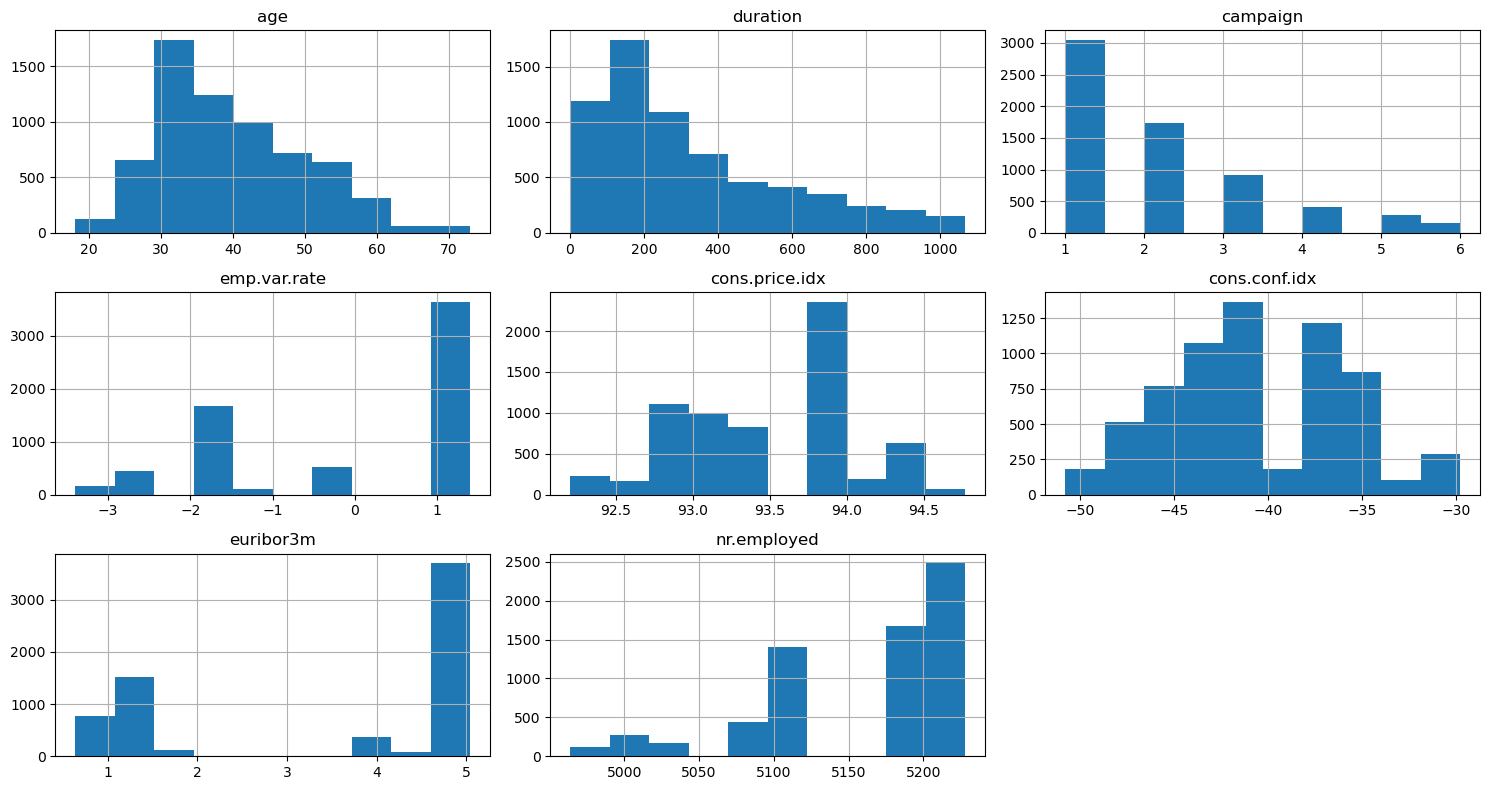

Skewness:


age               0.598601
duration          1.041608
campaign          1.324147
emp.var.rate     -0.575913
cons.price.idx   -0.214375
cons.conf.idx     0.104692
euribor3m        -0.545969
nr.employed      -0.880652
dtype: float64

In [29]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_feature.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_feature.skew()

Plotting the distribution of the target variable

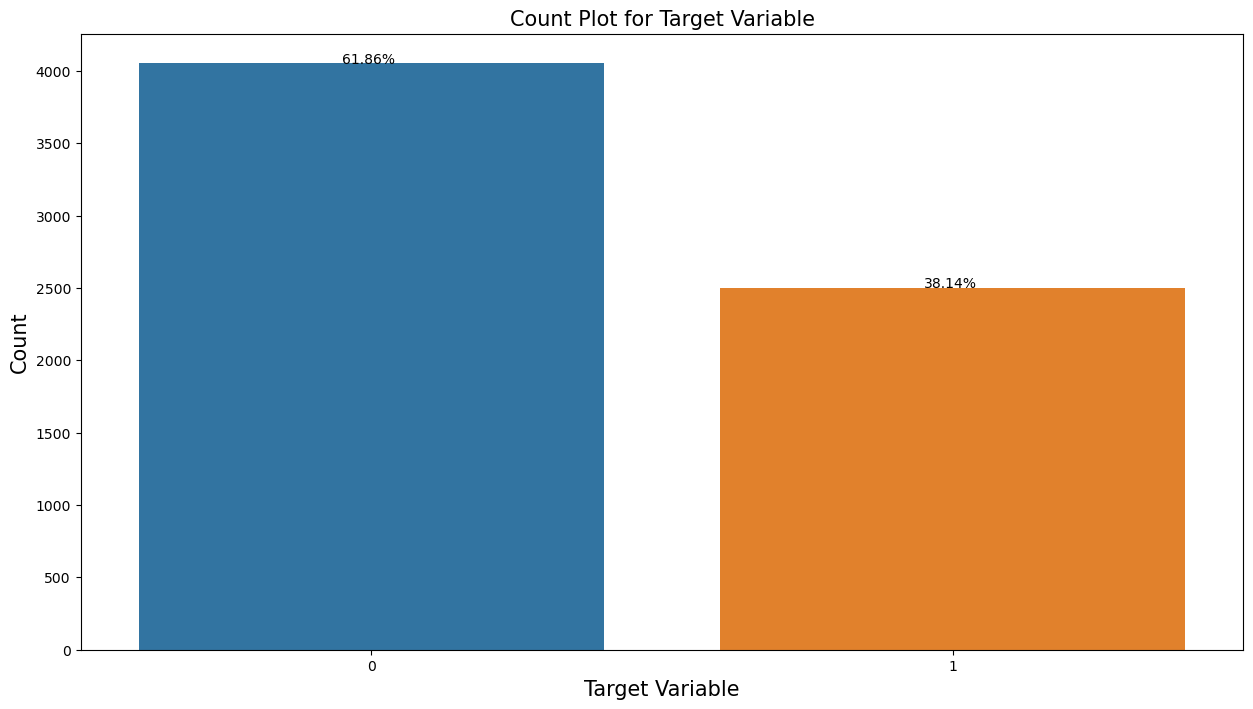

In [31]:
# get counts of 0's and 1's in the target variable
df_target.value_counts()

# plot the countplot of the target variable
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [33]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
num_scaled = X_scaler.fit_transform(df_feature)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_scaled, columns = df_feature.columns)

# display first five observations
X.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.722787,-0.480765,-0.024486,0.701361,0.749298,0.910658,0.765585,0.394074
1,-1.410132,-0.330797,0.754670,-1.081276,-1.217928,-2.008221,-1.104009,-0.840708
2,-0.330018,-0.445246,-0.803642,-0.036282,-0.607764,-0.291233,0.350869,0.458567
3,0.357326,0.880787,-0.803642,0.701361,0.749298,0.910658,0.765023,0.394074
4,1.241055,-1.037225,-0.803642,0.701361,0.749298,0.910658,0.763899,0.394074


## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [36]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)



X_train (5244, 8)
y_train (5244,)
X_test (1311, 8)
y_test (1311,)


<a id="knn"> </a>
## 1. K Nearest Neighbors (KNN)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

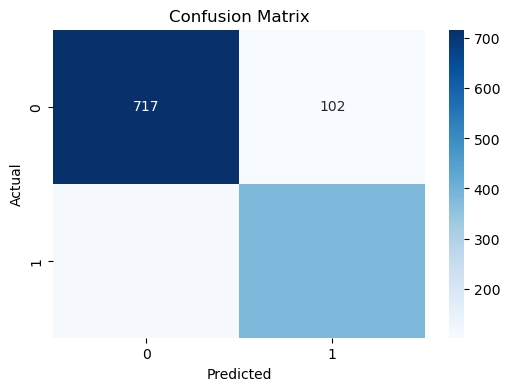

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
 
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

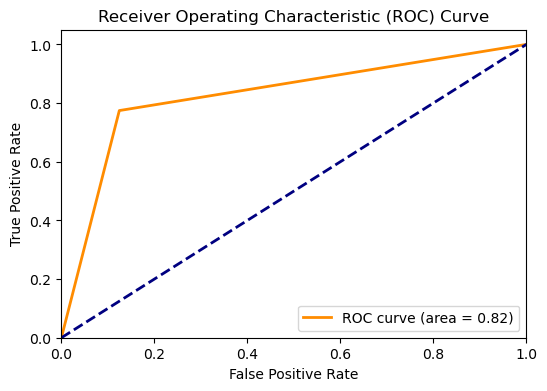

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_auc
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a knn model on a training dataset with euclidean distance and 3 neighbours to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# type your code here
sc = StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3 , p = 2)
knn.fit(X_train_sc,y_train)
ypred_knn = knn.predict(X_test_sc)

print('Accuracy Of the Model:',accuracy_score(y_test,ypred_knn))
print(classification_report(y_test,ypred_knn))


Accuracy Of the Model: 0.8504958047292144
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       819
           1       0.79      0.81      0.80       492

    accuracy                           0.85      1311
   macro avg       0.84      0.84      0.84      1311
weighted avg       0.85      0.85      0.85      1311



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Plot a confusion matrix for the KNN model in Question2 using the function created in Question1 and print a classification report. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

[[716 103]
 [ 93 399]]


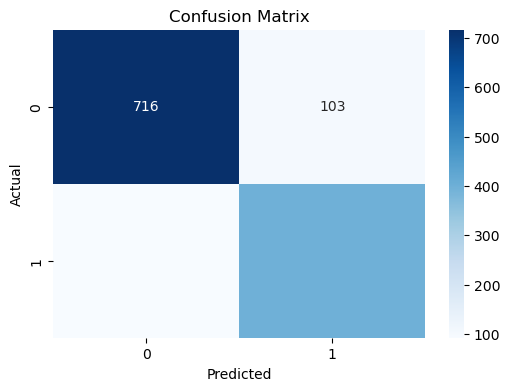

In [112]:
# type your code here
cm = metrics.confusion_matrix(y_test, ypred_knn)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Find the optimal value of the parameters from the given list of parameters in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)
    metric = ['hamming','euclidean','manhattan','Chebyshev']

In [47]:
# type your code here

metric = ['hamming','euclidean','manhattan','Chebyshev']
parameters = {'n_neighbors':np.arange(1, 25, 2),'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn11=KNeighborsClassifier()
knncv=GridSearchCV(knn11,parameters,cv=5,scoring = 'accuracy')
knncv.fit(X_train_sc,y_train)
knncv.best_params_

{'metric': 'manhattan', 'n_neighbors': 15}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a KNN model with the best parameters from Question4 and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
# type your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report





knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan')

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.858886346300534
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       819
           1       0.79      0.85      0.82       492

    accuracy                           0.86      1311
   macro avg       0.85      0.86      0.85      1311
weighted avg       0.86      0.86      0.86      1311



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in Question5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

AUC-ROC: 0.9262808104271518
Confusion Matrix:
 [[708 111]
 [ 74 418]]


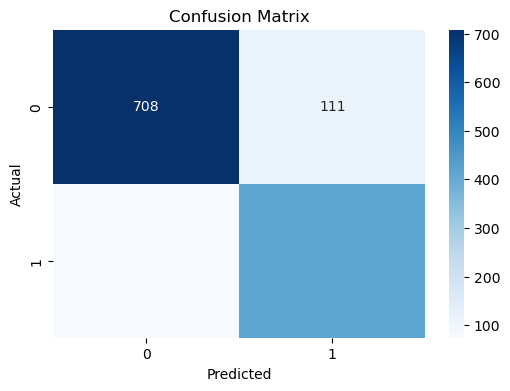

In [68]:
from sklearn.metrics import roc_curve, auc, confusion_matrix



# Make predictions with probabilities
y_pred_proba = knn.predict_proba(X_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('AUC-ROC:', roc_auc)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Calculate the percentage of misclassified and correctly classified observations for the model built in Question5.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
# type your code here
from sklearn.metrics import accuracy_score



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate misclassification rate
misclassification_rate = 1 - accuracy

# Calculate percentage of misclassified observations
misclassified_percentage = misclassification_rate * 100

# Calculate percentage of correctly classified observations
correctly_classified_percentage = accuracy * 100

print("Accuracy:", accuracy)
print("Misclassified Percentage:", misclassified_percentage)
print("Correctly Classified Percentage:", correctly_classified_percentage)


Accuracy: 0.858886346300534
Misclassified Percentage: 14.111365369946604
Correctly Classified Percentage: 85.88863463005339


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for euclidean distance metric. Consider only the odd numbers between the range 1 and 25 for the 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the odd K values between 1 and 25
k_values = list(range(1, 26, 2))

# List to store the accuracy for each K
accuracy = []

# Perform 5-fold cross-validation for each K and append the accuracy to the list
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracy.append(np.mean(cv_scores))

# Print the accuracy for each K value
for k, acc in zip(k_values, accuracy):
    print(f'K = {k}, Accuracy = {acc:.4f}')


K = 1, Accuracy = 0.8276
K = 3, Accuracy = 0.8514
K = 5, Accuracy = 0.8575
K = 7, Accuracy = 0.8606
K = 9, Accuracy = 0.8612
K = 11, Accuracy = 0.8617
K = 13, Accuracy = 0.8642
K = 15, Accuracy = 0.8625
K = 17, Accuracy = 0.8652
K = 19, Accuracy = 0.8650
K = 21, Accuracy = 0.8635
K = 23, Accuracy = 0.8640
K = 25, Accuracy = 0.8627


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Draw a line plot to see the accuracy (list created in the Question8) for each value of K(given) using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    n_neighbors = np.arange(1, 25, 2)

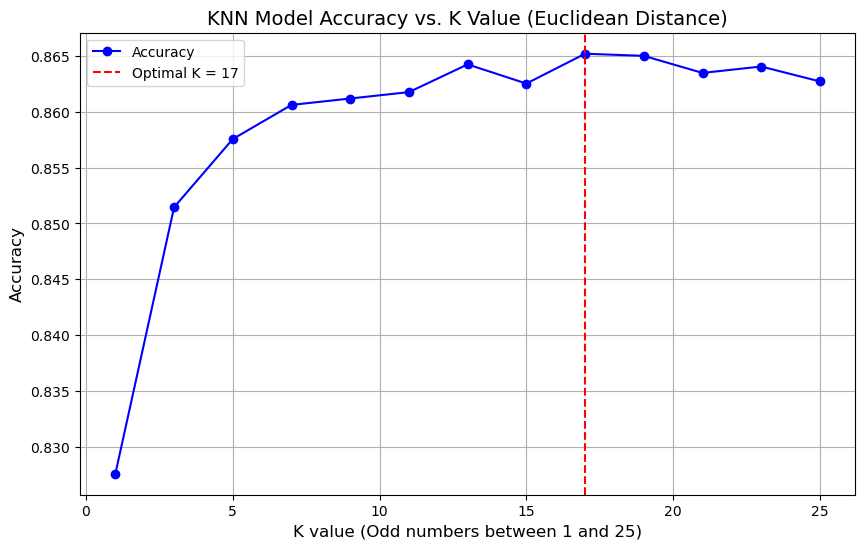

The optimal value of K is 17 with an accuracy of 0.8652


In [78]:
# type your code here
# Import necessary libraries
import matplotlib.pyplot as plt

# Define the odd K values between 1 and 25
k_values = list(range(1, 26, 2))

# Assuming 'accuracy' list has already been computed (as per previous question)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('K value (Odd numbers between 1 and 25)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Model Accuracy vs. K Value (Euclidean Distance)', fontsize=14)
plt.grid(True)

# Highlight the optimal K value
optimal_k = k_values[accuracy.index(max(accuracy))]
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Print the optimal K value
print(f'The optimal value of K is {optimal_k} with an accuracy of {max(accuracy):.4f}')


<a id="nb"> </a>
## 2. Naive Bayes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a Gaussian naive bayes model(no parameters) and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
# type your code here


# Create   

gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the   
 
y_pred = gnb.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.84      0.76      0.80       819
           1       0.66      0.75      0.70       492

    accuracy                           0.76      1311
   macro avg       0.75      0.76      0.75      1311
weighted avg       0.77      0.76      0.76      1311



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in Question10.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [98]:
# type your code here
y_pred_proba = gnb.predict_proba(X_test)[:, 1]  # Assuming binary classification

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print('AUC-ROC:', roc_auc)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

AUC-ROC: 0.8760385955507908
Confusion Matrix:
 [[625 194]
 [123 369]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a Gaussian Naive Bayes model(no parameters) and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [104]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a Gaussian Naive Bayes model (no parameters needed)
gnb = GaussianNB()

# Perform 10-fold cross-validation
scores = cross_val_score(gnb, X_scaled, df_target, cv=10, scoring='accuracy')

# Calculate and print the average accuracy
average_accuracy = scores.mean()
print("Average Accuracy from 10-fold CV:", average_accuracy)


Average Accuracy from 10-fold CV: 0.7803190746602122
